In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
%matplotlib inline

In [46]:
wine_data = pd.read_excel('Part2 - Company.xlsx')
wine_data

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
...,...,...,...,...,...
56,200,186,185,179,Quality B
57,137,182,165,199,NaN
58,88,39,9,102,NaN
59,180,157,192,198,NaN


In [47]:
wine_data.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [48]:
row, column = wine_data.shape
print('The dataset has', row, 'rows and', column, 'columns')

The dataset has 61 rows and 5 columns


In [49]:
#making the copy of wine data 
wine_data1 = wine_data.copy()

In [50]:
# dropping the target column(quality)
wine_data = wine_data.drop('Quality', axis=1)

In [51]:
#checking the data types of the copy dataset 
print("\nThese are the data types of each column",wine_data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB

These are the data types of each column None


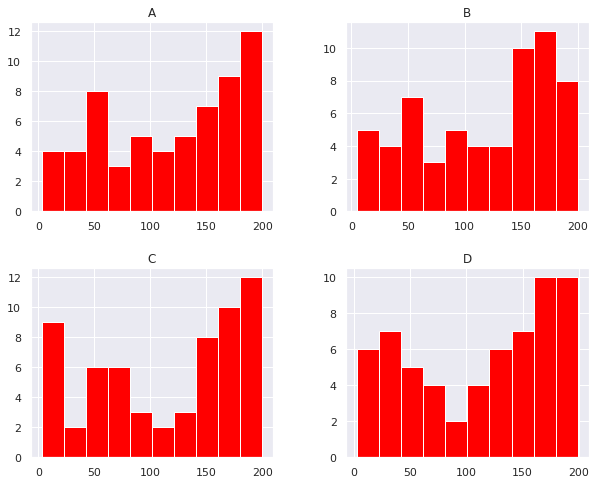

In [52]:
#checking the distribution of the data points
wine_data.hist(bins = 10, figsize = (10, 8), color = 'red')
plt.show()

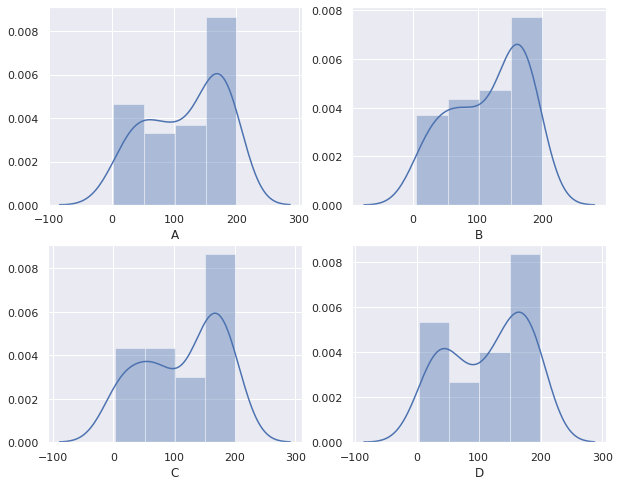

In [53]:
#checking for the density of the variable
plt.figure(figsize=(10, 8))
col = 1
for i in wine_data.columns:
    plt.subplot(2, 2, col)
    sns.distplot(wine_data[i], color = 'b')
    col += 1 

The chemical parameters A,B,C,D are in same range i.e between 0-200

In [54]:
#scaling the numeric variables
from scipy.stats import zscore
wi = wine_data.apply(zscore)
wi.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [55]:
#checking for the distribution of the targrt variables
wine_data1['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [56]:
#applying kmeans with 2 centroids
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2)
k_means.fit(wi)
labels = k_means.labels_

In [57]:
#calculating the silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(wi,labels)

0.6891674125195145

In [58]:
#Adding a cluster label to the dataset
wine_data1["Quality_k"] = labels

In [59]:
wine_data1.head(15)

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


In [60]:
#replacing cluster labels with the quality 
wine_data1['Quality_k'] = wine_data1['Quality_k'].replace({0: 'Quality A', 1: 'Quality B'})

In [61]:
wine = wine_data1.dropna()

In [63]:
wine.shape

(43, 6)

In [64]:
#using the cluster labels and actual target labels to check for accuracy
pred = wine['Quality_k']
actual=wine['Quality']

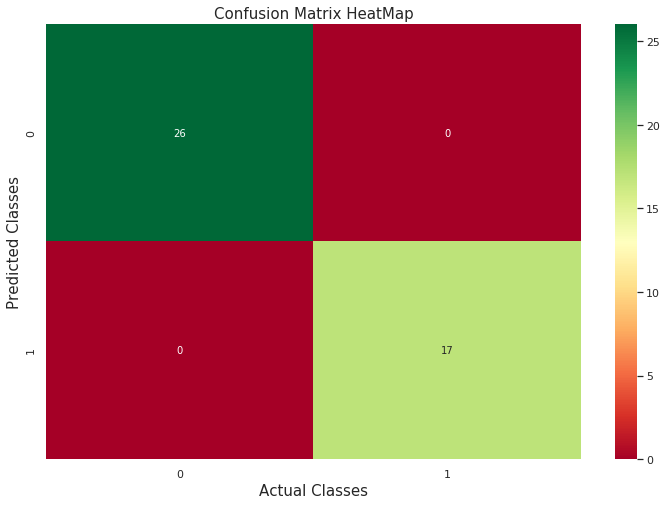

In [66]:
#visualization of confusion matrix in the form of a heatmap
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

cm= confusion_matrix(actual, pred)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

From the above confusion matrix we can say that there was no misclassification of data, Hence the new labels can be used as the target labes 

- Prepared By Akshat Dave 